In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train,x_test=x_train/255.0,x_test/255.0

In [4]:
x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)

In [5]:
from tensorflow.keras.layers import Dense,Input,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Model

In [6]:
K=len(set(y_train))
K

10

In [11]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',  
        metrics=['accuracy'])

r=model.fit(x_train, y_train,
                    validation_data=(x_test,y_test),
                    epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5204 - accuracy: 0.8070 - val_loss: 0.4105 - val_accuracy: 0.8465
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3581 - accuracy: 0.8667 - val_loss: 0.3667 - val_accuracy: 0.8631
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3073 - accuracy: 0.8845 - val_loss: 0.3265 - val_accuracy: 0.8725
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2759 - accuracy: 0.8962 - val_loss: 0.2961 - val_accuracy: 0.8911
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2477 - accuracy: 0.9062 - val_loss: 0.2996 - val_accuracy: 0.8888
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2252 - accuracy: 0.9143 - val_loss: 0.2929 - val_accuracy: 0.8947
Epoch 7/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2086 - accuracy: 0.9206 - val_loss: 0.3037 - val_accuracy:

In [12]:
print("Train score = ",model.evaluate(x_train,y_train))
print("Test score = ",model.evaluate(x_test,y_test))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0714 - accuracy: 0.9747
Train score =  [0.07144124060869217, 0.9746999740600586]
313/313 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.9031
Test score =  [0.36908870935440063, 0.9031000137329102]


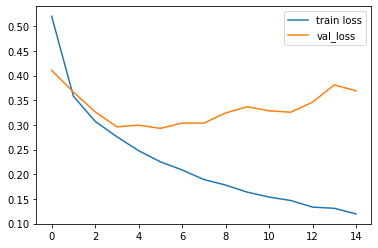

In [13]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

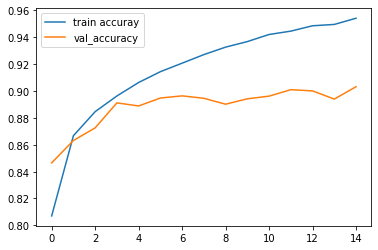

In [14]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[859   1  23  14   3   1  90   0   9   0]
 [  3 974   1  15   1   0   2   0   4   0]
 [ 17   0 879  10  39   0  53   0   2   0]
 [ 19   5  20 903  33   1  17   0   2   0]
 [  2   2  60  21 846   0  68   0   1   0]
 [  1   0   0   0   0 974   0  17   1   7]
 [106   0  71  26  77   1 702   0  17   0]
 [  0   0   0   0   0  15   0 974   1  10]
 [  2   1   4   2   2   3   8   1 976   1]
 [  1   0   0   0   0   8   0  47   0 944]]


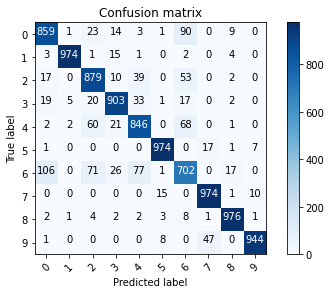

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
  else: 
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh=cm.max() /2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: 6 Predicted 0')

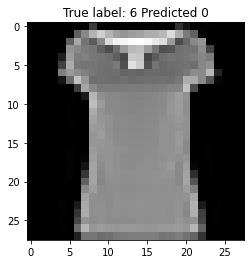

In [18]:
misclassifies_idx=np.where(p_test !=y_test)[0]
i = np.random.choice(misclassifies_idx)
plt.imshow(x_test[i].reshape(28,28 ),cmap='gray')
plt.title("True label: %s Predicted %s" % (y_test[i],p_test[i]))